# Import Necessary Library

In [1]:
import json
import nltk

!pip install nlp_utils
import pandas as pd
import numpy as np
import torch
import pickle
import tqdm
import random

from collections import Counter

import string
string.punctuation
!pip install langid
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
#nltk.download('punkt')
#nltk.download('stopwords')

!pip install stop-words
!pip install stop-words

from stop_words import get_stop_words

#!pip install googletrans==4.0.0-rc1
!pip install indic-transliteration
from indic_transliteration import sanscript

# Define the source and target scripts
source_script = sanscript.DEVANAGARI
target_script = sanscript.ITRANS

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.naive_bayes import MultinomialNB

# Open the JSON file

In [3]:
# Open and parse the Training JSON file
with open('.//MaSaC_train_erc.json', 'r') as json_file:
    train_data = json.load(json_file)

In [4]:
train_data[0]

{'episode': 'roseshantstobeadopted.wmv',
 'speakers': ['maya',
  'indu',
  'rosesh',
  'indu',
  'maya',
  'indu',
  'rosesh',
  'indu',
  'sahil',
  'rosesh',
  'maya',
  'indu',
  'sahil',
  'monish',
  'maya',
  'indu',
  'maya',
  'indu',
  'indu',
  'maya',
  'rosesh',
  'maya'],
 'utterances': ['kya kya bhar ke rakha hai indravadan ne is ghar mein indravadan please tum sari bekar ki chijen bahar kyon nahin fekte?',
  'ok, chalo rosesh chalo bahar',
  'momma! hath chhodiye dad!',
  'dekho maya ya na bol raha hai! fir tum hi kahogi faltu chijen jama karte ho fekte nahin ho, chalo',
  'indravadan, tum kitne salo se ye joke maar rahe ho. koi hota hai aaj tak?',
  'kaikai pe joke maroge to manthra thodi na hasegi',
  'very funny',
  'maya, monisha aur sahil aa rahe hain, dekhna yahi jo un per istemal karta hun aur dekhna vah kitna haste hain',
  'hi guys',
  'hi',
  'hi darling. achcha indravadan, please ya kachra bahar fenko!',
  'ok maya, chalo rosesh tumhen bahar fenk au',
  'mom! 

In [5]:
# Open and parse the validation JSON file
with open('.//MaSaC_val_erc.json', 'r') as json_file:
    validation_data = json.load(json_file)

In [6]:
validation_data[0]

{'episode': 'roseshantstobeadopted.wmv',
 'speakers': ['good rosesh',
  'bad rosesh',
  'good rosesh',
  'bad rosesh',
  'good rosesh',
  'bad rosesh',
  'good rosesh',
  'bad rosesh',
  'good rosesh',
  'rosesh',
  'rosesh',
  'maya',
  'rosesh'],
 'utterances': ['ye kya kar raha hai rosesh? bharat tera desh! bhartiya insan hai saccha. kisi ka khat padhna nahin hai achcha.',
  'hahaha khat padh le rosesh baby or padhne de hamen bhi. kitna achcha lagta hai balon mein gel, ding dong bell.',
  'kavita acchi hai lekin khayal achcha nahin hai, villain rosesh. momma ne kaha hai kisi aur ka khat padhna galat baat hai',
  'galat hai, par momma ne tumse kaha tha ki do bar brush karna aur tumne sirf ek bar kiya tha kya vah galat nahin tha?',
  'galat tha per',
  'momma ne tumse jab green chatni mangi thi aur tumne red pass ki thi kya vah galat nahin tha?',
  'wo to galat tha',
  'pichhle sal momma ki nayi hair style ostrich jesi thi aur tumne unhen apsara kaha tha kya vah galat nahin tha?',
  '

# Total number of episode in Training Data

In [7]:
# Create a list to store  episode names
total_episodes_1 = []

for conversation in train_data:
    episode = conversation["episode"]

    # Add the episode name to the set of unique episodes
    total_episodes_1.append(episode)


# Print the total number of  conversation topics or episodes
print("Total episode topics:", len(total_episodes_1))

Total episode topics: 343


# Distinct Episode name in Training coversation

In [8]:
# Convert the list of episode names to a set to get unique episodes
unique_episodes_1 = set(total_episodes_1)

# Print the unique episode names
print("Unique episode names:", unique_episodes_1)

# Print the total number of unique episodes
print("Total unique episodes:", len(unique_episodes_1))

Unique episode names: {'roseshpoetrypublication.wmv', 'roseshnayadon.wmv', 'monishasspeechonmaya.wmv', 'bachelor.wmv', 'african', 'video1.wmv', 'cricket.wmv', 'doggy', 'monishacomplainsofsahil.wmv', 'radhabaileaves', 'jaspal.wmv', 'baldev', 'mayaleavesindravardhan.wmv', 'roseshmarriesrita.wmw', 'monishaadaptstohighsociety', 'mayamonishabday.avi', 'patang', 'yamraj.wmv', 'jugalkishore.wmv', 'kavi.wmv', 'sharman.wmw', 'dushyant', 'election', 'monishasuicideattempt.wmv', 'prefinale', 'mayadoubtsindravardhan.wmv', 'neelimaverma.wmv', 'mayabetmonisha.wmv', 'introductiontothesarabhaifamily.avi', 'roseshantstobeadopted.wmv', 'mayaleavesindravardhan(1) (1).wmv', 'mayanighmare', 'sahillovestory.wmv', 'roseshaccident', 'mayaonacleaningdrive.wmv', 'finale.avi', 'playatcharityfunction', 'soniyaprediction.avi', 'prankonindravadhan', 'newcar', 'lease1.wmv', 'khilawal.wmv', 'bachlorparty', 'indravadanmissing.avi', 'scrabblecompetition.avi', 'popatlal', 'lease2.wmv', 'sahilmarriesmonisha.wmv', 'husban

In [9]:
total_episodes_1

episode_counts = {}

for episode_title in total_episodes_1:
    episode_counts[episode_title] = episode_counts.get(episode_title, 0) + 1

for title, count in episode_counts.items():
    print(f"{title} occurs {count} times")

roseshantstobeadopted.wmv occurs 5 times
video1.wmv occurs 8 times
yamraj.wmv occurs 7 times
finale.avi occurs 13 times
indravadanmissing.avi occurs 7 times
sharman.wmw occurs 6 times
soniyaprediction.avi occurs 7 times
bachelor.wmv occurs 7 times
cricket.wmv occurs 8 times
husbandsdonotcheat.avi occurs 11 times
introductiontothesarabhaifamily.avi occurs 6 times
jugalkishore.wmv occurs 8 times
kavi.wmv occurs 4 times
lease1.wmv occurs 8 times
lease2.wmv occurs 7 times
mayaleavesindravardhan(1) (1).wmv occurs 6 times
mayadoubtsindravardhan.wmv occurs 6 times
jaspal.wmv occurs 5 times
khilawal.wmv occurs 4 times
mayabetmonisha.wmv occurs 10 times
mayaleavesindravardhan.wmv occurs 6 times
mayamonishabday.avi occurs 6 times
mayanighmare occurs 5 times
mayaonacleaningdrive.wmv occurs 9 times
monishaadaptstohighsociety occurs 6 times
roseshnayadon.wmv occurs 5 times
roseshmarriesrita.wmw occurs 6 times
roseshpoetrypublication.wmv occurs 6 times
sahillovestory.wmv occurs 5 times
sahilmarriesm

In [10]:
import pandas as pd


# Create an empty list to store the data for each conversation
conversation_data = []

# Iterate through the JSON data and construct a DataFrame for each conversation
for conversation in train_data:
    episode = conversation["episode"]
    speakers = conversation["speakers"]
    utterances = conversation["utterances"]
    emotions = conversation["emotions"]

    # Create a DataFrame for the current conversation
    df = pd.DataFrame({
        "Episode": [episode] * len(speakers),
        "Speakers": speakers,
        "Utterances": utterances,
        "Emotions": emotions
    })

    # Append the DataFrame to the list
    conversation_data.append(df)

# Concatenate all conversation DataFrames into one DataFrame
train_df = pd.concat(conversation_data, ignore_index=True)
train_df.head(5)

,Episode,Speakers,Utterances,Emotions
0,roseshantstobeadopted.wmv,maya,kya kya bhar ke rakha hai indravadan ne is gha...,disgust
1,roseshantstobeadopted.wmv,indu,"ok, chalo rosesh chalo bahar",contempt
2,roseshantstobeadopted.wmv,rosesh,momma! hath chhodiye dad!,anger
3,roseshantstobeadopted.wmv,indu,dekho maya ya na bol raha hai! fir tum hi kaho...,neutral
4,roseshantstobeadopted.wmv,maya,"indravadan, tum kitne salo se ye joke maar rah...",neutral


In [11]:
#validation_data

In [12]:
import pandas as pd


# Create an empty list to store the data for each conversation
conversation_data = []

# Iterate through the JSON data and construct a DataFrame for each conversation
for conversation in validation_data:
    episode = conversation["episode"]
    speakers = conversation["speakers"]
    utterances = conversation["utterances"]
    emotions = conversation["emotions"]

    # Create a DataFrame for the current conversation
    df = pd.DataFrame({
        "Episode": [episode] * len(speakers),
        "Speakers": speakers,
        "Utterances": utterances,
        "Emotions": emotions
    })

    # Append the DataFrame to the list
    conversation_data.append(df)

# Concatenate all conversation DataFrames into one DataFrame
val_df = pd.concat(conversation_data, ignore_index=True)
val_df.head(5)

,Episode,Speakers,Utterances,Emotions
0,roseshantstobeadopted.wmv,good rosesh,ye kya kar raha hai rosesh? bharat tera desh! ...,neutral
1,roseshantstobeadopted.wmv,bad rosesh,hahaha khat padh le rosesh baby or padhne de h...,neutral
2,roseshantstobeadopted.wmv,good rosesh,kavita acchi hai lekin khayal achcha nahin hai...,neutral
3,roseshantstobeadopted.wmv,bad rosesh,"galat hai, par momma ne tumse kaha tha ki do b...",contempt
4,roseshantstobeadopted.wmv,good rosesh,galat tha per,neutral


In [13]:
# Find distinct emotions
distinct_emotions = train_df['Emotions'].unique()

# Print distinct emotions
print("Distinct Emotions:")
for emotion in distinct_emotions:
    print(emotion)

Distinct Emotions:
disgust
contempt
anger
neutral
joy
sadness
fear
surprise


In [14]:
# Find distinct emotions
distinct_emotions = val_df['Emotions'].unique()

# Print distinct emotions
print("Distinct Emotions:")
for emotion in distinct_emotions:
    print(emotion)

Distinct Emotions:
neutral
contempt
sadness
fear
joy
surprise
anger
disgust


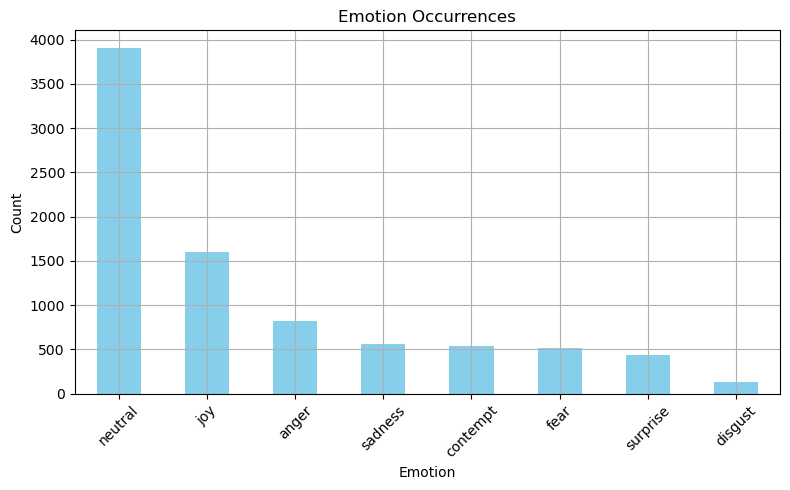

In [15]:
# Count the occurrences of each emotion
emotion_counts = train_df['Emotions'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Emotion Occurrences')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
# Show the plot
plt.show()

In [16]:
hindi_stopwords = get_stop_words('hi')  # 'hi' is the ISO 639-1 code for Hindi
hindi_stopwords

# Transliterate Hindi to Roman script (English characters)
transliterated_text = [sanscript.transliterate(word, source_script, target_script) for word in hindi_stopwords]

# Convert transliterated words to lowercase
lowercase_transliterated_text = [word.lower() for word in transliterated_text]


# combined list of stopwords for both English and Hindi

In [17]:
english_stopwords = set(stopwords.words('english'))
stop_words = set(english_stopwords)  # English stopwords

# Add Hindi stopwords to the set
hindi_stop_words = set(lowercase_transliterated_text)  # Add your Hindi stopwords here

stop_words.update(hindi_stop_words)
stop_words

{'a',
 'abhi',
 'about',
 'above',
 'adi',
 'after',
 'again',
 'against',
 'ain',
 'aise',
 'all',
 'am',
 'amdara',
 'an',
 'and',
 'any',
 'apa',
 'apana',
 'apane',
 'apani',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'ata',
 'aura',
 'bada',
 'bahi',
 'bahuta',
 'bala',
 'bani',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'bhi',
 'bhitara',
 'bilakula',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'dabara',
 'did',
 'didn',
 "didn't",
 'diya',
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'dusara',
 'dusare',
 'dvara',
 'each',
 'eka',
 'esa',
 'evam',
 'few',
 'for',
 'from',
 'further',
 'gaya',
 'ghara',
 'had',
 'hadn',
 "hadn't",
 'hai',
 'haim',
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'hi',
 'him',
 'himself',
 'his',
 'ho',
 'hona',
 'hone',
 'hota',
 'hote',
 'hoti',
 'how',
 'hua',
 'hue',
 'hui',
 'i',
 'if',
 

# Preprocessing code for each utterance

In [18]:
import re

def remove_numeric_sequences_and_ordinals(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove ordinal numbers
    text = re.sub(r'\b\d+(st|nd|rd|th)\b', '', text)

    return text

In [19]:
def remove_puntuations(txt):
    punct = set(string.punctuation)
    txt = " ".join(txt.split("."))
    txt = " ".join(txt.split("!"))
    txt = " ".join(txt.split("?"))
    txt = " ".join(txt.split(":"))
    txt = " ".join(txt.split(";"))
    
    txt = "".join(ch for ch in txt if ch not in punct)
    return txt

In [20]:
remove_puntuations('kya kya bhar? ke rakha hai indravadan ne is gha...')

'kya kya bhar  ke rakha hai indravadan ne is gha   '

In [21]:
# Function clean text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    #remove numeric and ordinals 
    text = remove_numeric_sequences_and_ordinals(text)

    # Remove punctuation
    text = remove_puntuations(text)

    # Remove extra white spaces
    text = ' '.join(text.split())

    # Remove stopwords
    total_stop_words = stop_words
    text = ' '.join([word for word in text.split() if word not in total_stop_words])

    return text

In [22]:
preprocess_text('kya kya bhar ke rakha hai indravadan ne is gha...')

'kya kya bhar rakha indravadan gha'

In [23]:
# Apply preprocessing to the 'Utterances' column
train_df['Clean_text'] = train_df['Utterances'].apply(preprocess_text)

# Print the first few rows of the modified DataFrame
train_df

,Episode,Speakers,Utterances,Emotions,Clean_text
0,roseshantstobeadopted.wmv,maya,kya kya bhar ke rakha hai indravadan ne is gha...,disgust,kya kya bhar rakha indravadan ghar mein indrav...
1,roseshantstobeadopted.wmv,indu,"ok, chalo rosesh chalo bahar",contempt,ok chalo rosesh chalo bahar
2,roseshantstobeadopted.wmv,rosesh,momma! hath chhodiye dad!,anger,momma hath chhodiye dad
3,roseshantstobeadopted.wmv,indu,dekho maya ya na bol raha hai! fir tum hi kaho...,neutral,dekho maya bol fir tum kahogi faltu chijen jam...
4,roseshantstobeadopted.wmv,maya,"indravadan, tum kitne salo se ye joke maar rah...",neutral,indravadan tum kitne salo joke maar aaj tak
...,...,...,...,...,...
8501,radhabaileaves,rosesh,lekin what about my ghadi? 17000 ki ghadi hai ...,sadness,lekin ghadi ghadi momma recurring alarm baje a...
8502,radhabaileaves,sita or geeta,"nhi nhi mujhe yahan pe kaamich nhi karna hai, ...",anger,nhi nhi mujhe yahan kaamich nhi karna jaa rhi hun
8503,radhabaileaves,maya,ahan!,joy,ahan
8504,radhabaileaves,sita or geeta,goodbye!,fear,goodbye


In [24]:
# Apply preprocessing to the 'Utterances' column
val_df['Clean_text'] = val_df['Utterances'].apply(preprocess_text)

# Print the first few rows of the modified DataFrame
val_df

,Episode,Speakers,Utterances,Emotions,Clean_text
0,roseshantstobeadopted.wmv,good rosesh,ye kya kar raha hai rosesh? bharat tera desh! ...,neutral,kya kar rosesh bharat tera desh bhartiya insan...
1,roseshantstobeadopted.wmv,bad rosesh,hahaha khat padh le rosesh baby or padhne de h...,neutral,hahaha khat padh le rosesh baby padhne de hame...
2,roseshantstobeadopted.wmv,good rosesh,kavita acchi hai lekin khayal achcha nahin hai...,neutral,kavita acchi lekin khayal achcha nahin villain...
3,roseshantstobeadopted.wmv,bad rosesh,"galat hai, par momma ne tumse kaha tha ki do b...",contempt,galat par momma tumse bar brush karna aur tumn...
4,roseshantstobeadopted.wmv,good rosesh,galat tha per,neutral,galat per
...,...,...,...,...,...
1349,prefinale,monish,sahil sahil sahil. sirf 4 din bache hai or sar...,fear,sahil sahil sahil sirf din bache sari ladkiyan...
1350,prefinale,sahil,haan lekin mom unn charo me se kisi ek ko fina...,neutral,haan lekin mom unn charo ek finalise kar lengi
1351,prefinale,monish,mummy ji ko to unme se koi pasand nhi hai,sadness,mummy ji unme pasand nhi
1352,prefinale,sahil,rosesh ko?,neutral,rosesh


In [25]:
train = train_df[["Emotions","Clean_text"]]
train

,Emotions,Clean_text
0,disgust,kya kya bhar rakha indravadan ghar mein indrav...
1,contempt,ok chalo rosesh chalo bahar
2,anger,momma hath chhodiye dad
3,neutral,dekho maya bol fir tum kahogi faltu chijen jam...
4,neutral,indravadan tum kitne salo joke maar aaj tak
...,...,...
8501,sadness,lekin ghadi ghadi momma recurring alarm baje a...
8502,anger,nhi nhi mujhe yahan kaamich nhi karna jaa rhi hun
8503,joy,ahan
8504,fear,goodbye


In [26]:
# Assuming train is the DataFrame containing the 'Clean_text' column
max_words = train['Clean_text'].apply(lambda x: len(x.split())).max()
print(f"The maximum number of words in an utterance is: {max_words}")

The maximum number of words in an utterance is: 94


In [27]:
# Assuming 'train' is the DataFrame containing the 'Clean_text' column
max_words_index = train['Clean_text'].apply(lambda x: len(x.split())).idxmax()
print(f"The index number of the row with the maximum number of words: {max_words_index}")

The index number of the row with the maximum number of words: 2315


In [28]:
train["Clean_text"][2315]

'khar khar khar khar chale cinema reel cinema parde par aaya sushil sushil acting uske muscles kartein hain cehera hain blank mara kabootar dailogue bole lagta hain bigda hain padooshi scooter sushil heroine sandhya kapde jitne taklu saar par hoon baal aage suniyega sandhya acche dete hain chipkaali expression sandhya acche deti hain chipkali expression lekin phirbhi sandhya banega best actress iss saal sushil muscles milega award kyuki uske papa hain jury par samjhe picture deenge start critics kyuki wo hain producers chaamche phir main jaa kar dekhte hoon kyu kyu main dard hain'

In [29]:
validation = val_df[["Emotions","Clean_text"]]

In [30]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the 'clean_text' column
unique_words = set(' '.join(train['Clean_text']).split())
sorted_unique_words = sorted(unique_words)
len(sorted_unique_words)

10669

In [31]:
sorted_unique_words[0:10]

['aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaa',
 'aaaaaannneeee',
 'aaaaah',
 'aaah',
 'aaahaaahaaa',
 'aaahh']

In [32]:
word_to_index = {word: index for index, word in enumerate(sorted_unique_words)}
word_to_index

{'aa': 0,
 'aaa': 1,
 'aaaa': 2,
 'aaaaa': 3,
 'aaaaaa': 4,
 'aaaaaannneeee': 5,
 'aaaaah': 6,
 'aaah': 7,
 'aaahaaahaaa': 8,
 'aaahh': 9,
 'aaak': 10,
 'aaan': 11,
 'aab': 12,
 'aachar': 13,
 'aachhii': 14,
 'aadami': 15,
 'aadarsh': 16,
 'aadat': 17,
 'aadh': 18,
 'aadha': 19,
 'aadhe': 20,
 'aadhi': 21,
 'aadi': 22,
 'aadmi': 23,
 'aae': 24,
 'aaee': 25,
 'aaega': 26,
 'aaegee': 27,
 'aaegi': 28,
 'aaenge': 29,
 'aaengi': 30,
 'aag': 31,
 'aage': 32,
 'aagya': 33,
 'aah': 34,
 'aahaha': 35,
 'aahh': 36,
 'aahhh': 37,
 'aahhhh': 38,
 'aahi': 39,
 'aaho': 40,
 'aai': 41,
 'aaila': 42,
 'aain': 43,
 'aaine': 44,
 'aaiye': 45,
 'aaj': 46,
 'aaja': 47,
 'aajad': 48,
 'aajadi': 49,
 'aajao': 50,
 'aajeeb': 51,
 'aajkal': 52,
 'aajse': 53,
 'aajtak': 54,
 'aaju': 55,
 'aakar': 56,
 'aake': 57,
 'aakhain': 58,
 'aakhi': 59,
 'aakhir': 60,
 'aakhiri': 61,
 'aakhri': 62,
 'aakr': 63,
 'aalab': 64,
 'aalas': 65,
 'aalo': 66,
 'aaloo': 67,
 'aam': 68,
 'aamin': 69,
 'aamir': 70,
 'aan': 71,
 'a

# Add one words for unknown words

In [33]:
word_to_index['unknown_word'] = len(word_to_index)
sorted_unique_words.append('unknown_word')

In [34]:
sorted_unique_words[-1]

'unknown_word'

# Vectorize the text

In [35]:
import numpy as np

# Function to vectorize the text
def vectorize_text(text, unique_words_list):
    word_to_index = {word: index for index, word in enumerate(unique_words_list)}
    total_length = len(unique_words_list)
    sentence_vector = np.zeros(total_length)
    
    words = text.split()
    for word in words:
        if word in word_to_index:
            word_vector = np.zeros(total_length)
            word_vector[word_to_index[word]] = 1
            sentence_vector += word_vector 
        else:
            word_vector = np.zeros(total_length)
            word_vector[-1] = 1
            sentence_vector += word_vector

    # Normalize the sentence vector by dividing by the total length of the sentence
    if len(words) > 0:
        sentence_vector /= len(words)
    
    return sentence_vector

# Creating a dictionary to store the vectors
vectors_dict = {}

for index, row in train.iterrows():
    vectors_dict[index] = vectorize_text(row['Clean_text'], sorted_unique_words)

# Printing the vector for each row
#for index, vector in vectors_dict.items():
    #print(f"Vector for utterance {index}: {vector}")

In [36]:
np.sum(vectors_dict[0])

0.9999999999999999

In [37]:
# Creating a dictionary to store the vectors
vectors_dict1 = {}

for index, row in validation.iterrows():
    vectors_dict1[index] = vectorize_text(row['Clean_text'], sorted_unique_words)

In [38]:
X_train = np.array(list(vectors_dict.values()))
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
X_validation = np.array(list(vectors_dict1.values()))
X_validation

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.15384615],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.22222222],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.08695652]])

In [40]:
y_train = train['Emotions']
y_train

0        disgust
1       contempt
2          anger
3        neutral
4        neutral
          ...   
8501     sadness
8502       anger
8503         joy
8504        fear
8505     disgust
Name: Emotions, Length: 8506, dtype: object

In [41]:
y_validation = validation["Emotions"]
y_validation

0        neutral
1        neutral
2        neutral
3       contempt
4        neutral
          ...   
1349        fear
1350     neutral
1351     sadness
1352     neutral
1353        fear
Name: Emotions, Length: 1354, dtype: object

# Fit the KNN model

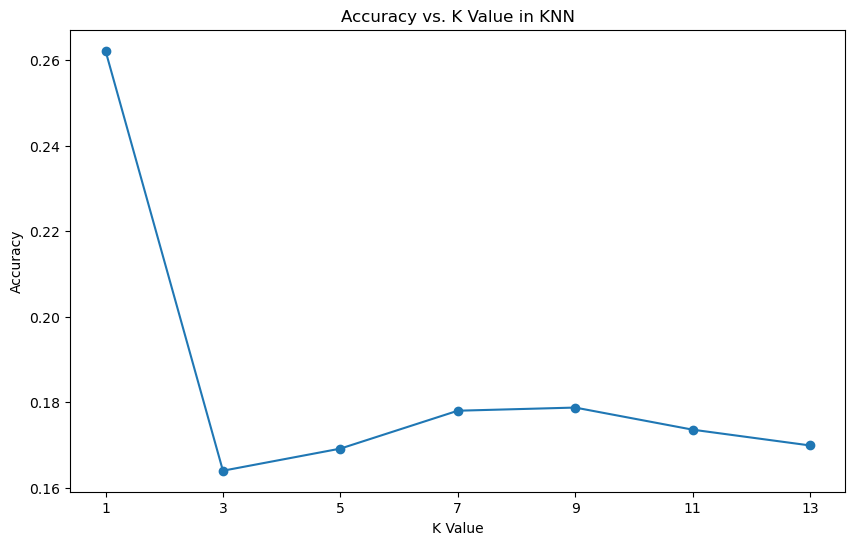

In [41]:
# Define different values of k
k_values = [1, 3, 5, 7, 9, 11,13]
accuracies = []
conf_matrices = []

for k in k_values:
    # Fitting the model
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    # Predicting on the validation set
    y_pred_knn = knn_model.predict(X_validation)

    # Calculate the accuracy
    accuracy_knn = accuracy_score(y_validation, y_pred_knn)
    accuracies.append(accuracy_knn)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_validation, y_pred_knn)
    conf_matrices.append(conf_matrix)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. K Value in KNN')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

In [42]:
import pandas as pd

# Printing accuracies for different k values
for i, k in enumerate(k_values):
    print(f"Accuracy for k={k}: {accuracies[i]}")

# Creating a DataFrame for k values and accuracies
data = {'K Value': k_values, 'Accuracy': accuracies}
df_knn = pd.DataFrame(data)
print(df_knn)

Accuracy for k=1: 0.2621861152141802
Accuracy for k=3: 0.16395864106351551
Accuracy for k=5: 0.16912850812407682
Accuracy for k=7: 0.1779911373707533
Accuracy for k=9: 0.17872968980797638
Accuracy for k=11: 0.17355982274741508
Accuracy for k=13: 0.16986706056129985
   K Value  Accuracy
0        1  0.262186
1        3  0.163959
2        5  0.169129
3        7  0.177991
4        9  0.178730
5       11  0.173560
6       13  0.169867


In [43]:
# Confusion matrix

In [44]:
# Plotting the confusion matrices
for i, conf_matrix in enumerate(conf_matrices):
    print(f"Confusion Matrix for k = {k_values[i]}:")
    print(conf_matrix)

Confusion Matrix for k = 1:
[[  9   3   1   6  69  27   2   1]
 [  4   5   1   1  53   7   3   0]
 [  4   1   2   0  11   2   0   1]
 [  4   5   0   3  41  28   3   4]
 [  6  11   0   9 149  45   5   3]
 [ 24  18   1  38 341 166  29  16]
 [  1   6   1  13  71  21  11   2]
 [  2   2   2   2  32  12   4  10]]
Confusion Matrix for k = 3:
[[ 10   2   0   4  10  22   1  69]
 [  4   5   0   2   7   4   1  51]
 [  3   3   1   1   1   3   0   9]
 [  9   3   1   7   8  19   1  40]
 [  9  12   0  16  29  30   2 130]
 [ 45  28   3  31  71 137   6 312]
 [  4  11   2  16   7  19   3  64]
 [  5   2   1   2   8  18   0  30]]
Confusion Matrix for k = 5:
[[  6   0   0   3   6  22   1  80]
 [  1   0   0   2   8   7   0  56]
 [  2   2   1   1   2   2   0  11]
 [  4   2   0   5   5  24   1  47]
 [  4   8   0   5  30  39   2 140]
 [ 34   7   1  15  54 151   5 366]
 [  1   4   0  15  10  18   3  75]
 [  3   2   0   0   5  23   0  33]]
Confusion Matrix for k = 7:
[[  4   1   0   1   8  22   2  80]
 [  1   2 

In [45]:
#rbf kernal method

In [46]:
# Creating an SVM model
svm_model = SVC(kernel='rbf', class_weight='balanced')  # Use 'balanced' class weight for imbalanced datasets
svm_model.fit(X_train, y_train)

# Making predictions
y_pred_svm = svm_model.predict(X_validation)

# Calculating the confusion matrix
conf_matrix_svm = confusion_matrix(y_validation, y_pred_svm)
print("Confusion Matrix for SVM:")
print(conf_matrix_svm)

Confusion Matrix for SVM:
[[ 40  24   0   6  13  22  10   3]
 [ 12  34   0   4   7   8   7   2]
 [  1   8   2   1   1   7   1   0]
 [ 16   7   0  18  10  17  15   5]
 [ 19  31   1  11  84  46  26  10]
 [ 67 107   5  46 116 195  61  36]
 [ 17  22   0  10  12  17  42   6]
 [  5  11   0   2   1  26   3  18]]


In [47]:
from sklearn.metrics import accuracy_score

accuracy_svm = accuracy_score(y_validation, y_pred_svm)
print(f"Accuracy of the SVM model: {accuracy_svm}")

Accuracy of the SVM model: 0.31979320531757754


In [48]:
# Creating a linear SVM model
linear_svm_model = SVC(kernel='linear', class_weight='balanced')  # Use 'balanced' class weight for imbalanced datasets
linear_svm_model.fit(X_train, y_train)

# Making predictions
y_pred_linear_svm = linear_svm_model.predict(X_validation)

# Calculating the confusion matrix
conf_matrix_linear_svm = confusion_matrix(y_validation, y_pred_linear_svm)
print("Confusion Matrix for Linear SVM:")
print(conf_matrix_linear_svm)

# Calculating the accuracy
accuracy_linear_svm = accuracy_score(y_validation, y_pred_linear_svm)
print(f"Accuracy of the Linear SVM model: {accuracy_linear_svm}")

Confusion Matrix for Linear SVM:
[[ 43  28   3   4   7  15  16   2]
 [ 23  30   1   2   3   9   4   2]
 [  5   9   5   1   0   0   1   0]
 [ 24  17   1  15   2  12  14   3]
 [ 25  66   3  13  53  31  30   7]
 [116 180  13  46  58 108  78  34]
 [ 22  31   1  13   5  14  37   3]
 [  5  23   1   2   5   7   6  17]]
Accuracy of the Linear SVM model: 0.2274741506646972


In [49]:
# Creating a polynomial SVM model with a third-degree polynomial kernel
poly_svm_model = SVC(kernel='poly', degree=3, class_weight='balanced')  # Use 'balanced' class weight for imbalanced datasets
poly_svm_model.fit(X_train, y_train)

# Making predictions
y_pred_poly_svm = poly_svm_model.predict(X_validation)

# Calculating the confusion matrix
conf_matrix_poly_svm = confusion_matrix(y_validation, y_pred_poly_svm)
print("Confusion Matrix for Polynomial SVM (Degree 3):")
print(conf_matrix_poly_svm)

# Calculating the accuracy
accuracy_poly_svm = accuracy_score(y_validation, y_pred_poly_svm)
print(f"Accuracy of the Polynomial SVM (Degree 3) model: {accuracy_poly_svm}")

Confusion Matrix for Polynomial SVM (Degree 3):
[[  6 100   0   2   2   6   0   2]
 [  3  68   0   0   1   0   1   1]
 [  3  16   1   0   0   0   1   0]
 [  3  71   0   3   0   7   2   2]
 [  5 178   1   3  17  13   4   7]
 [ 19 507   6   8  16  44   8  25]
 [  3 105   0   4   1   2   8   3]
 [  4  45   0   0   1   3   0  13]]
Accuracy of the Polynomial SVM (Degree 3) model: 0.11816838995568685


In [50]:
# Creating an SVM model with an intersection kernel
intersection_svm_model = SVC(kernel='sigmoid', class_weight='balanced')  # Use 'balanced' class weight for imbalanced datasets
intersection_svm_model.fit(X_train, y_train)

# Making predictions
y_pred_intersection_svm = intersection_svm_model.predict(X_validation)

# Calculating the confusion matrix
conf_matrix_intersection_svm = confusion_matrix(y_validation, y_pred_intersection_svm)
print("Confusion Matrix for SVM with Intersection Kernel:")
print(conf_matrix_intersection_svm)

# Calculating the accuracy
accuracy_intersection_svm = accuracy_score(y_validation, y_pred_intersection_svm)
print(f"Accuracy of the SVM with Intersection Kernel model: {accuracy_intersection_svm}")

Confusion Matrix for SVM with Intersection Kernel:
[[ 27   7   9  12  19  20  12  12]
 [  9  15   9   9   4  17   4   7]
 [  2   4   7   2   2   2   2   0]
 [ 10   9   5  14   7   8  27   8]
 [ 15  28  15  19  70  22  34  25]
 [ 67  87  44  71 130  85  73  76]
 [  8  13  11  20  12  16  35  11]
 [  3   7   2   4  20   3   4  23]]
Accuracy of the SVM with Intersection Kernel model: 0.2038404726735598


In [51]:
# Creating a logistic regression model
logistic_model = LogisticRegression(class_weight='balanced', max_iter=1000)

# Fitting the model
logistic_model.fit(X_train, y_train)

# Making predictions
y_pred_logistic = logistic_model.predict(X_validation)

# Calculating the confusion matrix
conf_matrix_logistic = confusion_matrix(y_validation, y_pred_logistic)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_logistic)

# Calculating the accuracy
accuracy_logistic = accuracy_score(y_validation, y_pred_logistic)
print(f"Accuracy of the Logistic Regression model: {accuracy_logistic}")

Confusion Matrix for Logistic Regression:
[[ 30  15   7  10  18  14  21   3]
 [ 13  18   5   8   7  10   9   4]
 [  4   6   5   1   3   0   2   0]
 [ 12   6   3  25   8   7  21   6]
 [ 12  26   9  24  86  21  36  14]
 [ 69  85  27  72 137  99  96  48]
 [ 13  10   8  16  14  10  48   7]
 [  5   5   1   3  19   4   6  23]]
Accuracy of the Logistic Regression model: 0.2466765140324963


# Naive-bayes

In [52]:
# Creating a Naive Bayes model
naive_bayes_model = MultinomialNB()

# Fitting the model
naive_bayes_model.fit(X_train, y_train)

# Making predictions
y_pred_naive_bayes = naive_bayes_model.predict(X_validation)

# Calculating the confusion matrix
conf_matrix_naive_bayes = confusion_matrix(y_validation, y_pred_naive_bayes)
print("Confusion Matrix for Naive Bayes:")
print(conf_matrix_naive_bayes)

# Calculating the accuracy
accuracy_naive_bayes = accuracy_score(y_validation, y_pred_naive_bayes)
print(f"Accuracy of the Naive Bayes model: {accuracy_naive_bayes}")

Confusion Matrix for Naive Bayes:
[[  0   0   0   0   0 118   0   0]
 [  0   0   0   0   2  72   0   0]
 [  0   0   0   0   0  21   0   0]
 [  0   0   0   0   0  88   0   0]
 [  0   0   0   0   5 223   0   0]
 [  0   0   0   0   0 633   0   0]
 [  0   0   0   0   0 126   0   0]
 [  0   0   0   0   0  66   0   0]]
Accuracy of the Naive Bayes model: 0.4711964549483013


# Random forest

In [53]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [54]:
# Create a Random Forest classi
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_validation)

# Calculate accuracy
accuracy = accuracy_score(y_validation, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.47636632200886264


In [55]:
# Calculating the confusion matrix
conf_matrix_forest = confusion_matrix(y_validation, y_pred)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_forest)

Confusion Matrix for Random Forest:
[[  6   0   0   1   3 108   0   0]
 [  2   1   0   0   4  65   1   1]
 [  2   1   2   0   0  15   1   0]
 [  1   1   0   3   1  80   1   1]
 [  1   1   0   2  48 171   2   3]
 [  9   2   0   5  37 567   3  10]
 [  1   1   0   2   3 110   7   2]
 [  0   0   0   2   1  52   0  11]]


# RNN MODEL

In [42]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the 'clean_text' column
all_text = ' '.join(train['Clean_text'])
# create a list of words
words = all_text.split()

In [43]:
words

['kya',
 'kya',
 'bhar',
 'rakha',
 'indravadan',
 'ghar',
 'mein',
 'indravadan',
 'please',
 'tum',
 'sari',
 'bekar',
 'chijen',
 'bahar',
 'kyon',
 'nahin',
 'fekte',
 'ok',
 'chalo',
 'rosesh',
 'chalo',
 'bahar',
 'momma',
 'hath',
 'chhodiye',
 'dad',
 'dekho',
 'maya',
 'bol',
 'fir',
 'tum',
 'kahogi',
 'faltu',
 'chijen',
 'jama',
 'karte',
 'fekte',
 'nahin',
 'chalo',
 'indravadan',
 'tum',
 'kitne',
 'salo',
 'joke',
 'maar',
 'aaj',
 'tak',
 'kaikai',
 'joke',
 'maroge',
 'manthra',
 'thodi',
 'hasegi',
 'funny',
 'maya',
 'monisha',
 'aur',
 'sahil',
 'aa',
 'hain',
 'dekhna',
 'un',
 'per',
 'istemal',
 'karta',
 'hun',
 'aur',
 'dekhna',
 'vah',
 'kitna',
 'haste',
 'hain',
 'guys',
 'darling',
 'achcha',
 'indravadan',
 'please',
 'kachra',
 'bahar',
 'fenko',
 'ok',
 'maya',
 'chalo',
 'rosesh',
 'tumhen',
 'bahar',
 'fenk',
 'au',
 'mom',
 'diwali',
 'lunch',
 'hamare',
 'ghar',
 'aur',
 'mein',
 'khana',
 'fresh',
 'banane',
 'wali',
 'hun',
 'rest',
 'case',
 'ind

In [44]:
words[:30]

['kya',
 'kya',
 'bhar',
 'rakha',
 'indravadan',
 'ghar',
 'mein',
 'indravadan',
 'please',
 'tum',
 'sari',
 'bekar',
 'chijen',
 'bahar',
 'kyon',
 'nahin',
 'fekte',
 'ok',
 'chalo',
 'rosesh',
 'chalo',
 'bahar',
 'momma',
 'hath',
 'chhodiye',
 'dad',
 'dekho',
 'maya',
 'bol',
 'fir']

In [45]:
# Assuming train is the DataFrame containing the 'Clean_text' column
max_words = train['Clean_text'].apply(lambda x: len(x.split())).max()
print(f"The maximum number of words in an utterance is: {max_words}")

The maximum number of words in an utterance is: 94


In [46]:
# Assuming 'train' is the DataFrame containing the 'Clean_text' column
max_words_index = train['Clean_text'].apply(lambda x: len(x.split())).idxmax()
print(f"The index number of the row with the maximum number of words: {max_words_index}")

The index number of the row with the maximum number of words: 2315


In [47]:
# feel free to use this import
from collections import Counter

## Build a dictionary that maps words to integers
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab,1)}

In [48]:
vocab_to_int

{'mein': 1,
 'kya': 2,
 'aur': 3,
 'hain': 4,
 'monisha': 5,
 'sahil': 6,
 'wo': 7,
 'nahi': 8,
 'kar': 9,
 'tum': 10,
 'nahin': 11,
 'main': 12,
 'ek': 13,
 'rosesh': 14,
 'aap': 15,
 'mujhe': 16,
 'haan': 17,
 'toh': 18,
 'maya': 19,
 'mai': 20,
 'lekin': 21,
 'hun': 22,
 'ji': 23,
 'nhi': 24,
 'rahi': 25,
 'ghar': 26,
 'meri': 27,
 'mom': 28,
 'dad': 29,
 'baat': 30,
 'mere': 31,
 'yah': 32,
 'vah': 33,
 'nehi': 34,
 'please': 35,
 'bhai': 36,
 'ab': 37,
 'agar': 38,
 'momma': 39,
 'maine': 40,
 'mera': 41,
 'oh': 42,
 'fir': 43,
 'le': 44,
 'kuch': 45,
 'hoga': 46,
 'kaise': 47,
 'tumne': 48,
 'pata': 49,
 'han': 50,
 'par': 51,
 'yahan': 52,
 'matlab': 53,
 'okay': 54,
 'aa': 55,
 'mummy': 56,
 'apne': 57,
 'hu': 58,
 'hum': 59,
 'kuchh': 60,
 'ha': 61,
 'sab': 62,
 'karne': 63,
 'aaj': 64,
 'phone': 65,
 'per': 66,
 'kyu': 67,
 'tumhe': 68,
 'mat': 69,
 'vo': 70,
 'come': 71,
 'de': 72,
 'tu': 73,
 'naam': 74,
 'sath': 75,
 'mean': 76,
 'chalo': 77,
 'kyun': 78,
 'hello': 79,
 'i

In [49]:
vocab_to_int['unknown_word'] = 0

In [50]:
## use the dict to tokenize each review in reviews_split
## store the tokenized utterance in utterance_ints
utterance_ints = []
for utterance in train['Clean_text']:
    utterance_ints.append([vocab_to_int[word] for word in utterance.split()])

In [51]:
# stats about vocabulary
print('Unique words: ', len((vocab_to_int)))  # 
print()

# print tokens in first utterance
print('Tokenized utterance: \n', utterance_ints[:1])

Unique words:  10670

Tokenized utterance: 
 [[2, 2, 360, 392, 108, 26, 1, 108, 35, 10, 443, 2084, 2572, 153, 109, 11, 3430]]


In [52]:
# stats about vocabulary
print('Unique words: ', len((vocab_to_int)))  # 
print()

# print tokens in second utterance
print('Tokenized utterance: \n', utterance_ints[1:2])

Unique words:  10670

Tokenized utterance: 
 [[89, 77, 14, 77, 153]]


In [53]:
# outlier review stats
utterance_lens = Counter([len(x) for x in utterance_ints])
print("Zero-length utterance: {}".format(utterance_lens[0]))
print("Maximum utterance length: {}".format(max(utterance_lens)))

Zero-length utterance: 89
Maximum utterance length: 94


In [54]:
vocab_to_int.keys()

dict_keys(['mein', 'kya', 'aur', 'hain', 'monisha', 'sahil', 'wo', 'nahi', 'kar', 'tum', 'nahin', 'main', 'ek', 'rosesh', 'aap', 'mujhe', 'haan', 'toh', 'maya', 'mai', 'lekin', 'hun', 'ji', 'nhi', 'rahi', 'ghar', 'meri', 'mom', 'dad', 'baat', 'mere', 'yah', 'vah', 'nehi', 'please', 'bhai', 'ab', 'agar', 'momma', 'maine', 'mera', 'oh', 'fir', 'le', 'kuch', 'hoga', 'kaise', 'tumne', 'pata', 'han', 'par', 'yahan', 'matlab', 'okay', 'aa', 'mummy', 'apne', 'hu', 'hum', 'kuchh', 'ha', 'sab', 'karne', 'aaj', 'phone', 'per', 'kyu', 'tumhe', 'mat', 'vo', 'come', 'de', 'tu', 'naam', 'sath', 'mean', 'chalo', 'kyun', 'hello', 'iye', 'haa', 'din', 'gayi', 'jab', 'dekho', 'indu', 'god', 'mei', 'ok', 'indravardhan', 'kahan', 'karna', 'karti', 'baa', 'karo', 'tumhari', 'kavita', 'arey', 'tumhare', 'dont', 'good', 'dushyant', 'know', 'aisa', 'bahut', 'class', 'log', 'indravadan', 'kyon', 'apni', 'karte', 'saath', 'keya', 'beta', 'wale', 'bohot', 'lo', 'party', 'accha', 'sirf', 'dekha', 'wala', 'gaye', 

In [55]:
'unknown_word' in vocab_to_int.keys()

True

In [56]:
key_list = list(vocab_to_int.keys())

In [59]:
#key_list

In [60]:
len(key_list)

10670

In [61]:
# Function to vectorize the text
def tokenize_utterance(text, vocab_to_int):
    key_list = list(vocab_to_int.keys())
    words = text.split()
    # tokens
    text_ints = []
    for word in words:
        if word in key_list:
            text_ints.append(vocab_to_int[word])
        else:
            text_ints.append(vocab_to_int['unknown_word'])  # Assign a special value for unknown words
            
    return text_ints


In [62]:
## store the tokenized utterance in utterance_ints
utterance_ints_1 = []
for utterance in train['Clean_text']:
    utterance_ints_1.append(tokenize_utterance(utterance,vocab_to_int))

In [63]:
#utterance_ints_1

In [64]:
## store the tokenized utterance in utterance_ints
utterance_ints_2 = []
for utterance in validation['Clean_text']:
    utterance_ints_2.append(tokenize_utterance(utterance,vocab_to_int))

In [65]:
#utterance_ints_2

In [66]:
# Dictionary to map emotions to labels with different numeric values
emotion_to_label = {
    'disgust': 0,
    'contempt': 1,
    'anger': 2,
    'neutral': 3,
    'joy': 4,
    'sadness': 5,
    'fear': 6,
    'surprise': 7
}


# Encode the labels for training
#train_encoded_labels = np.array([emotion_to_label[label] for label in train["Emotions"]])

In [67]:
train_encoded_labels = np.array([emotion_to_label[label] for label in train["Emotions"]])
train_encoded_labels

array([0, 1, 2, ..., 4, 6, 0])

In [68]:
np.unique(train_encoded_labels)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [69]:
# Encode the labels for validation
validation_encoded_labels = np.array([emotion_to_label[label] for label in validation["Emotions"]])

In [70]:
print('Number of utterances before removing outliers: ', len(utterance_ints_1))

## remove any utterances/labels with zero length from the utterance_ints list.

## get any indices of any utterances with length 0
non_zero_idx = [ii for ii, utterance in enumerate(utterance_ints_1) if len(utterance) != 0]

# remove 0-length review with their labels
ro_utterance_ints_1 = [utterance_ints_1[ii] for ii in non_zero_idx]
train_encoded_labels = np.array([train_encoded_labels[ii] for ii in non_zero_idx])

print('Number of utterances after removing outliers: ', len(ro_utterance_ints_1))

Number of utterances before removing outliers:  8506
Number of utterances after removing outliers:  8417


In [71]:
print('Number of utterances before removing outliers: ', len(utterance_ints_2))

## remove any utterances/labels with zero length from the utterance_ints list.

## get any indices of any utterances with length 0
non_zero_idx = [ii for ii, utterance in enumerate(utterance_ints_2) if len(utterance) != 0]

# remove 0-length review with their labels
ro_utterance_ints_2 = [utterance_ints_2[ii] for ii in non_zero_idx]
validation_encoded_labels = np.array([validation_encoded_labels[ii] for ii in non_zero_idx])

print('Number of utterances after removing outliers: ', len(ro_utterance_ints_2))

Number of utterances before removing outliers:  1354
Number of utterances after removing outliers:  1330


In [72]:
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, utterance in enumerate(sentences):
        if len(utterance) != 0:
            features[ii, -len(utterance):] = np.array(utterance)[:seq_len]
    return features



In [73]:
seq_len = 100
x_train_pad = padding_(ro_utterance_ints_1,100)
x_test_pad = padding_(ro_utterance_ints_2,100)

In [74]:
x_train_pad

array([[   0,    0,    0, ...,  109,   11, 3430],
       [   0,    0,    0, ...,   14,   77,  153],
       [   0,    0,    0, ...,  268, 2085,   29],
       ...,
       [   0,    0,    0, ...,    0,    0, 3422],
       [   0,    0,    0, ...,    0,    0, 2585],
       [   0,    0,    0, ...,  194,  197,  370]])

In [75]:
# print last 10 values of the first 30 batches
print(x_train_pad[:30,90:100])

[[ 108   35   10  443 2084 2572  153  109   11 3430]
 [   0    0    0    0    0   89   77   14   77  153]
 [   0    0    0    0    0    0   39  268 2085   29]
 [  43   10 5152 1321 2572 2086  111 3430   11   77]
 [   0    0  108   10  273 2573  361  393   64  134]
 [   0    0    0    0 5153  361 5154 2574  171 5155]
 [   0    0    0    0    0    0    0    0    0  345]
 [  66 1730  202   22    3  567   33  287 3431    4]
 [   0    0    0    0    0    0    0    0    0  695]
 [   0    0    0  173  203  108   35  882  153 5156]
 [   0    0   89   19   77   14  175  153  830 5157]
 [   0    0    0    0    0   28  883  735  463   26]
 [   0    0    0    3    1  218 1731  736  130   22]
 [ 108 2575  490  269  203   37   35  882  153  830]
 [   0    0   89   19   77    5   68  153  830 2576]
 [   0    0    0    0    0   61   61   61  108  345]
 [  99  883  735   66  334 5158 5159    3 5160 5161]
 [ 599  361   84   40    5   66  296   85   47   25]
 [ 124  884  269  108   14  696 1494 1064  882

In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from keras.utils import to_categorical
import seaborn as sns

2023-11-11 18:18:11.509800: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-11 18:18:11.550455: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-11 18:18:11.551350: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-11 18:18:12.281507: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [77]:
# Assuming train_encoded_labels is your array of labels
# Assuming num_classes is the total number of classes (in this case, 8)
num_classes = 8

# Convert labels to one-hot encoding
train_one_hot_labels = to_categorical(train_encoded_labels, num_classes=num_classes)
train_one_hot_labels


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [78]:

num_classes = 8

# Convert labels to one-hot encoding
validation_one_hot_labels = to_categorical(validation_encoded_labels, num_classes=num_classes)
validation_one_hot_labels



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [79]:
y_train = train_encoded_labels
y_test = validation_encoded_labels

In [80]:
voc_size = 11000

In [81]:
# Define the model
model = Sequential()

# Add an Embedding layer
model.add(Embedding(input_dim=voc_size, output_dim = 64, input_length = 100))

# Add an LSTM layer
model.add(LSTM(64, return_sequences=True))

# Add a second LSTM layer
model.add(LSTM(64))

# Add a Dense layer with ReLU activation
model.add(Dense(64, activation='relu'))

# Add a Dropout layer
model.add(Dropout(0.5))

# Add the output layer with softmax activation for classification
model.add(Dense(8, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

2023-11-11 18:18:14.794783: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-11 18:18:14.795532: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           704000    
                                                                 
 lstm (LSTM)                 (None, 100, 64)           33024     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
Total params: 774728 (2.96 MB)
Trainable params: 774728 

In [82]:
from tensorflow.keras.regularizers import l2

# Define the model
model = Sequential()

# Add an Embedding layer
model.add(Embedding(input_dim=voc_size, output_dim=64, input_length = 100))

# Add an LSTM layer
model.add(LSTM(32, return_sequences=True))

# Add a second LSTM layer
model.add(LSTM(32))

# Add a Dense layer with ReLU activation and L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

# Add a Dropout layer
model.add(Dropout(0.5))

# Add the output layer with softmax activation for classification
model.add(Dense(8, activation='softmax'))

# Compile the model with Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           704000    
                                                                 
 lstm_2 (LSTM)               (None, 100, 32)           12416     
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 520       
                                                                 
Total params: 727368 (2.77 MB)
Trainable params: 72736

In [83]:
# Train the model
history = model.fit(x_train_pad, y_train, epochs=100, validation_data=(x_test_pad, y_test))

Epoch 1/100
264/264 [==============================] - 18s 58ms/step - loss: 1.8837 - accuracy: 0.4494 - val_loss: 1.7041 - val_accuracy: 0.4632
Epoch 2/100
264/264 [==============================] - 15s 55ms/step - loss: 1.6447 - accuracy: 0.4610 - val_loss: 1.6466 - val_accuracy: 0.4579
Epoch 3/100
264/264 [==============================] - 15s 55ms/step - loss: 1.4927 - accuracy: 0.4832 - val_loss: 1.6742 - val_accuracy: 0.4496
Epoch 4/100
264/264 [==============================] - 15s 56ms/step - loss: 1.3763 - accuracy: 0.5007 - val_loss: 1.7684 - val_accuracy: 0.4278
Epoch 5/100
264/264 [==============================] - 15s 56ms/step - loss: 1.2821 - accuracy: 0.5129 - val_loss: 1.8441 - val_accuracy: 0.4195
Epoch 6/100
264/264 [==============================] - 15s 56ms/step - loss: 1.1990 - accuracy: 0.5390 - val_loss: 1.9911 - val_accuracy: 0.3744
Epoch 7/100
264/264 [==============================] - 15s 57ms/step - loss: 1.0840 - accuracy: 0.5965 - val_loss: 2.0710 - val_ac

264/264 [==============================] - 15s 58ms/step - loss: 0.2065 - accuracy: 0.9405 - val_loss: 5.7129 - val_accuracy: 0.3677
Epoch 58/100
264/264 [==============================] - 15s 57ms/step - loss: 0.2072 - accuracy: 0.9430 - val_loss: 5.6399 - val_accuracy: 0.3737
Epoch 59/100
264/264 [==============================] - 15s 57ms/step - loss: 0.2030 - accuracy: 0.9430 - val_loss: 5.8814 - val_accuracy: 0.3556
Epoch 60/100
264/264 [==============================] - 15s 57ms/step - loss: 0.2062 - accuracy: 0.9419 - val_loss: 5.9006 - val_accuracy: 0.3872
Epoch 61/100
264/264 [==============================] - 15s 58ms/step - loss: 0.2200 - accuracy: 0.9417 - val_loss: 5.2013 - val_accuracy: 0.3827
Epoch 62/100
264/264 [==============================] - 15s 57ms/step - loss: 0.2166 - accuracy: 0.9392 - val_loss: 5.6990 - val_accuracy: 0.3684
Epoch 63/100
264/264 [==============================] - 15s 57ms/step - loss: 0.2095 - accuracy: 0.9429 - val_loss: 5.3416 - val_accuracy

In [84]:
def plot_graphs(history, string):
    """
    Function: Displays changes in monitored loss and metrics during model training
    
    Arguments: monitoring logs
    
    Returns: A line graph with changes of loss and metrics over time
    """
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

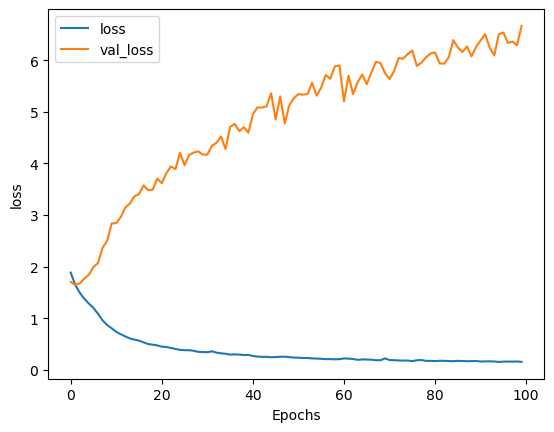

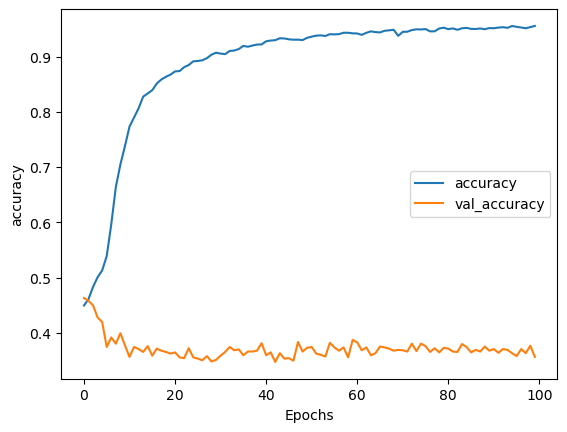

In [85]:
plot_graphs(history, "loss")
plot_graphs(history, "accuracy")

In [86]:
loss, accuracy = model.evaluate(x_test_pad, y_test)

42/42 [==============================] - 1s 14ms/step - loss: 6.6645 - accuracy: 0.3564


In [87]:
print(f"Model accuracy is {accuracy * 100}%")

Model accuracy is 35.63909828662872%


In [88]:
predicted_proba = np.argmax(model.predict(x_test_pad), axis =-1)

42/42 [==============================] - 1s 14ms/step


In [89]:
predicted_proba

array([3, 2, 6, ..., 6, 3, 2])

In [90]:
confusion_matrix = tf.math.confusion_matrix(y_test, predicted_proba).numpy()

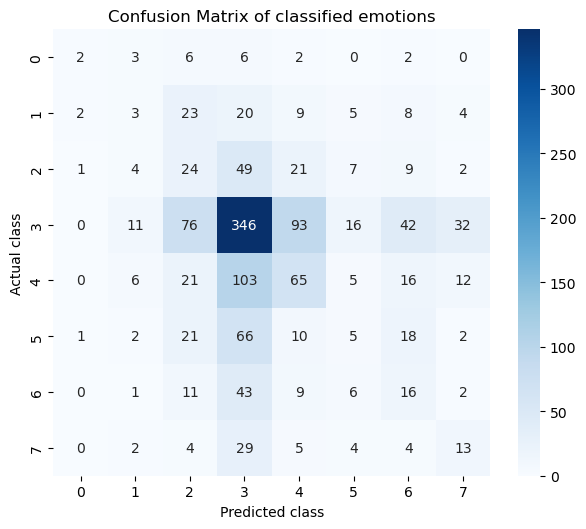

In [91]:
figure = plt.figure(figsize = (6, 5))
sns.heatmap(confusion_matrix, annot = True, fmt = ".0f", cmap = plt.cm.Blues)
plt.tight_layout()
plt.ylabel("Actual class")
plt.xlabel("Predicted class")
plt.title("Confusion Matrix of classified emotions")
plt.show()
